In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resultfb/resultFB.csv
/kaggle/input/fandbdataset/DataFB.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [6]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [7]:
pca = PCA(n_components=3)

principal_components = pca.fit_transform(X)

new_X = pd.DataFrame(data = principal_components, columns=['PC1','PC2','PC3'])

In [8]:
new_X.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


<Figure size 1080x1080 with 0 Axes>

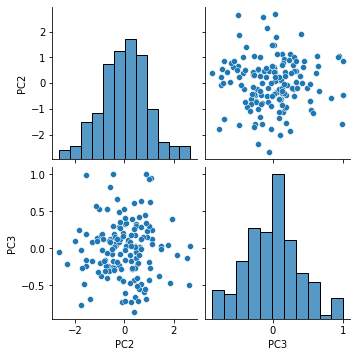

In [9]:
plt.figure(figsize=(15, 15))
sns.pairplot(new_X, vars = new_X.columns[1:13]);

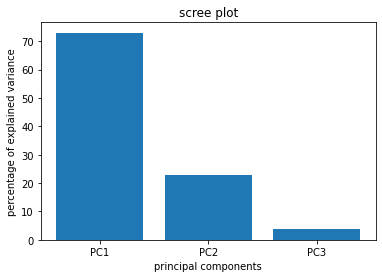

In [10]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals =1)

label = ['PC' + str(x) for x in range (1, len(per_var)+1)]

plt.bar (x=range(1, len(per_var)+1),height=per_var,tick_label=label)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal components')
plt.title('scree plot')
plt.show()

In [11]:
new_X.describe()

,PC1,PC2,PC3
count,1.500000e+02,1.500000e+02,1.500000e+02
mean,5.684342e-16,1.154632e-16,1.421085e-16
std,1.714084e+00,9.592523e-01,3.843720e-01
min,-2.774345e+00,-2.654073e+00,-8.574218e-01
25%,-2.102721e+00,-5.984875e-01,-2.590613e-01
50%,4.183111e-01,1.750202e-02,2.476241e-02
75%,1.343027e+00,5.940342e-01,1.945133e-01
max,3.310696e+00,2.686284e+00,1.005401e+00


In [12]:
from sklearn.cluster import KMeans
wcss=[]

In [13]:
new_X.shape

(150, 3)

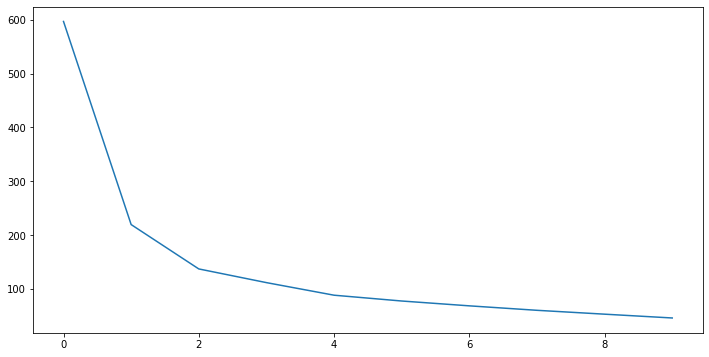

In [14]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_X.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_X.values)

KMeans(n_clusters=3, random_state=0)

In [16]:
new_X['target'] = y
new_X['fit'] = kmeans.labels_

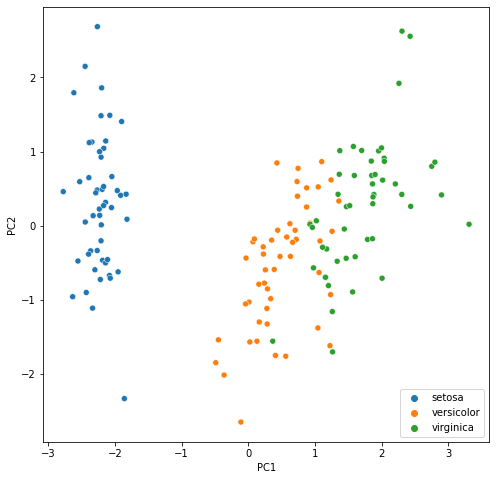

In [17]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='PC1', y='PC2', hue=new_X.target.to_list(), data=new_X);

In [18]:
new_X.head()

,PC1,PC2,PC3,target,fit
0,-2.264703,0.480027,-0.127706,setosa,1
1,-2.080961,-0.674134,-0.234609,setosa,1
2,-2.364229,-0.341908,0.044201,setosa,1
3,-2.299384,-0.597395,0.091290,setosa,1
4,-2.389842,0.646835,0.015738,setosa,1


In [19]:
new_X.insert(0,"Category",np.nan,True)
new_X.loc[new_X['fit'] == 0, 'Category'] = 0
new_X.loc[new_X['fit'] == 1, 'Category'] = 1
new_X.loc[new_X['fit'] == 2, 'Category'] = 2
new_X.loc[new_X['fit'] == 3, 'Category'] = 3

new_X.head(5)

,Category,PC1,PC2,PC3,target,fit
0,1.0,-2.264703,0.480027,-0.127706,setosa,1
1,1.0,-2.080961,-0.674134,-0.234609,setosa,1
2,1.0,-2.364229,-0.341908,0.044201,setosa,1
3,1.0,-2.299384,-0.597395,0.091290,setosa,1
4,1.0,-2.389842,0.646835,0.015738,setosa,1


In [20]:
new_X.drop(["fit","target"], axis=1, inplace=True)
new_X.columns = ['Category','PC1 (St.)','PC2 (St.)', 'PC3 (St.)']
new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Category   150 non-null    float64
 1   PC1 (St.)  150 non-null    float64
 2   PC2 (St.)  150 non-null    float64
 3   PC3 (St.)  150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


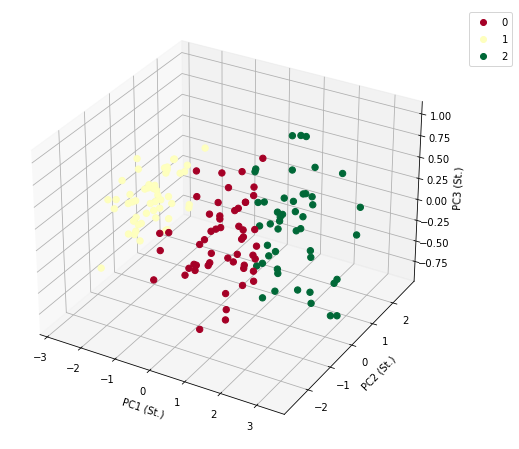

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_X['PC1 (St.)']
y = new_X['PC2 (St.)']
z = new_X['PC3 (St.)']

ax.set_xlabel("PC1 (St.)")
ax.set_ylabel("PC2 (St.)")
ax.set_zlabel("PC3 (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_X['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

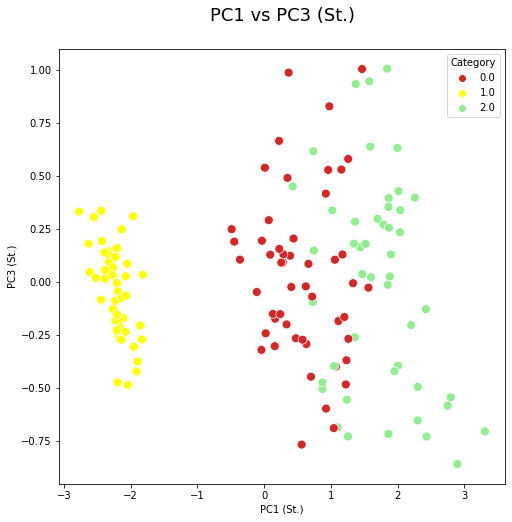

In [22]:
palette = {0:"tab:red",
           1:"yellow", 
           2:"lightgreen",
           3:"darkgreen"}

sns.scatterplot(x='PC1 (St.)', y='PC3 (St.)', 
                hue='Category', data=new_X, s=80,
                palette=palette)
plt.title("PC1 vs PC3 (St.)", fontsize=18, y=1.05)
plt.show()

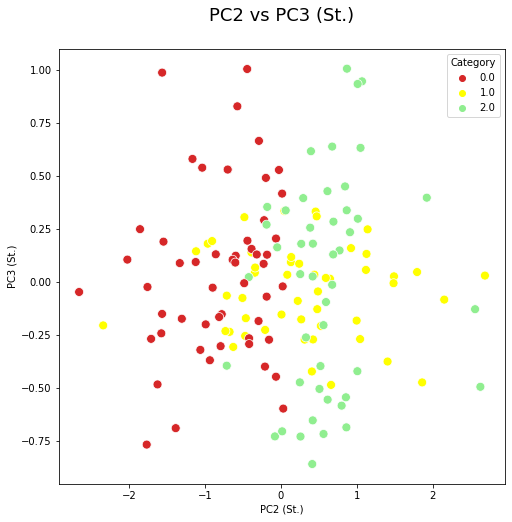

In [23]:
sns.scatterplot(x='PC2 (St.)', y='PC3 (St.)', 
                hue='Category', data=new_X, s=80,
                palette=palette)
plt.title("PC2 vs PC3 (St.)", fontsize=18, y=1.05)
plt.show()

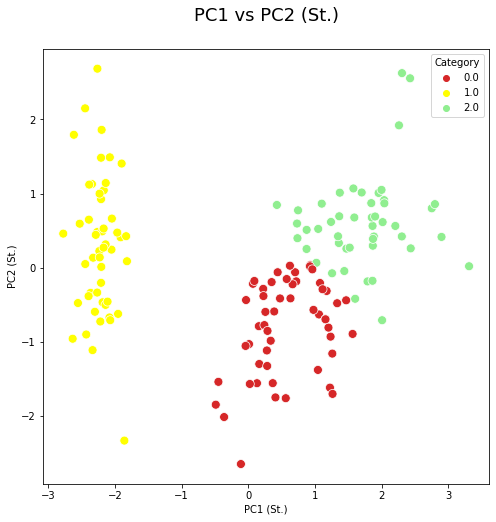

In [24]:
sns.scatterplot(x='PC1 (St.)', y='PC2 (St.)', 
                hue='Category', data=new_X, s=80,
                palette=palette)
plt.title("PC1 vs PC2 (St.)", fontsize=18, y=1.05)
plt.show()

In [25]:
new_X.drop (['Category'], axis=1, inplace=True)

In [26]:
dftemp = pd.read_csv('../input/resultfb/resultFB.csv')
df2 = pd.read_csv('../input/fandbdataset/DataFB.csv')
df2.drop(['DER','Operating Profit Margin','Return on Assets','Sales Growth'], axis=1, inplace=True)
df3 = pd.concat([dftemp, new_X, df2], axis=1)
df3.head(35)

,Industry,Company,PC1 (St.),PC2 (St.),PC3 (St.),Emitten,Category
0,Food and Beverages,Daimond Food Indonesia Tbk.,-2.264703,0.480027,-0.127706,DMND,2.0
1,Food and Beverages,Prima Cakrawala Abadi Tbk.,-2.080961,-0.674134,-0.234609,PCAR,1.0
2,Food and Beverages,Akasha Wira International Tbk.,-2.364229,-0.341908,0.044201,ADES,2.0
3,Food and Beverages,FKS Food Sejahtera Tbk.,-2.299384,-0.597395,0.091290,AISA,3.0
4,Food and Beverages,Tri Banyan Tirta Tbk.,-2.389842,0.646835,0.015738,ALTO,3.0
5,Food and Beverages,Bumi Teknokultura Unggul Tbk.,-2.075631,1.489178,0.026968,BTEK,1.0
6,Food and Beverages,Budi Starch & Sweetener Tbk.,-2.444029,0.047644,0.335470,BUDI,3.0
7,Food and Beverages,Campina Ice Cream Industry Tbk.,-2.232847,0.223148,-0.088695,CAMP,3.0
8,Food and Beverages,Wilmar Cahaya Indonesia Tbk.,-2.334640,-1.115328,0.145077,CEKA,2.0
9,Food and Beverages,Sariguna Primatirta Tbk.,-2.184328,-0.469014,-0.253766,CLEO,2.0
